In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df=pd.read_csv("CWC23_all_innings.csv")

In [79]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,05-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [80]:
# Explore the data
df.tail()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.0,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.0,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.0,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.0,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN
1407,NZ,LH Ferguson (NZ),bowl,48,65,0.0,0.0,1.354167,v India,Wankhede,15-Nov-23,8.0,0.0,8.12,1,NaN,NaN,NaN,NaN,NaN


In [81]:
#1. Team Performance Analysis:
# - Explore team-wise performance metrics.
# - Analyze runs scored, wickets taken, and batting/bowling styles.
# - Identify top-performing teams and their strengths.


Team-wise Performance Metrics:
  team  runs  wkts bat_or_bowl
0  AFG  4134  53.0         bat
1  AUS  5234  77.0         bat
2  BAN  4358  51.0         bat
3  ENG  4396  65.0         bat
4  IND  4796  95.0         bat
5  NED  4255  62.0         bat
6   NZ  5376  71.0         bat
7  PAK  4786  65.0         bat
8   SA  5097  88.0         bat
9   SL  4366  50.0         bat


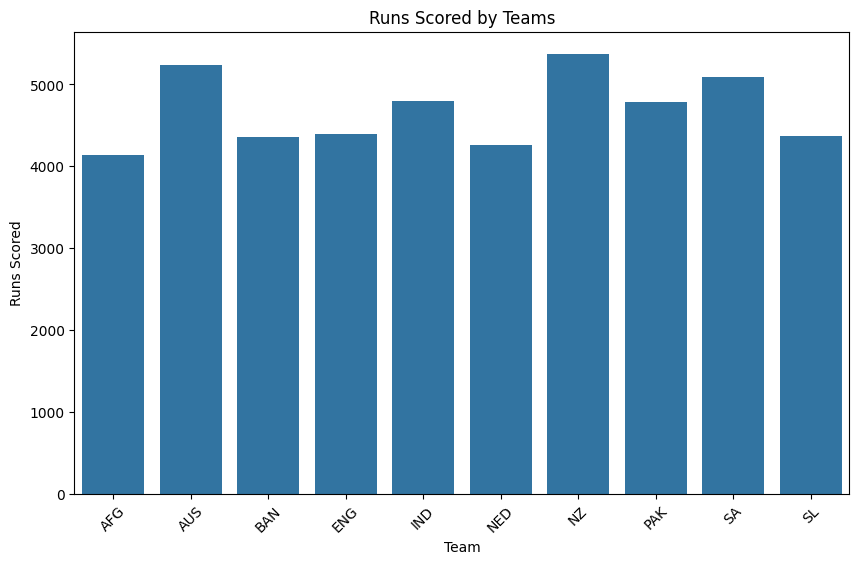

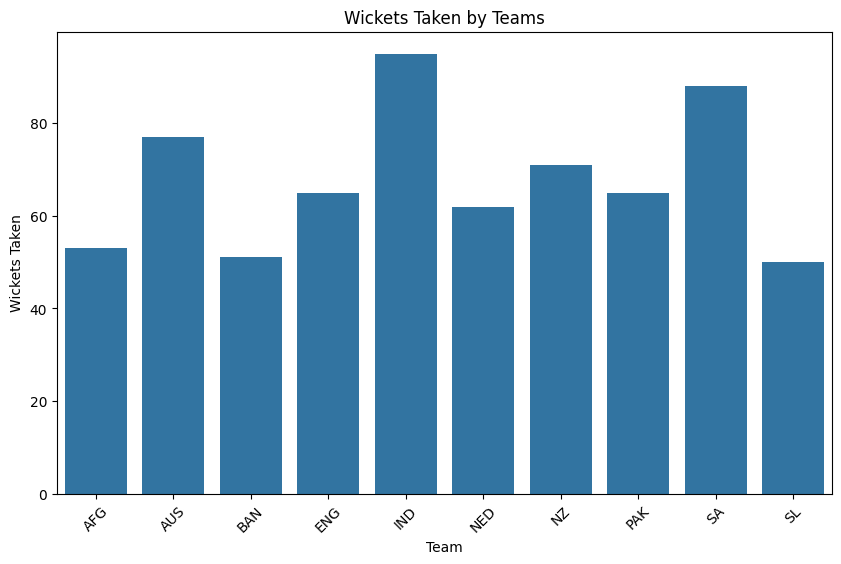

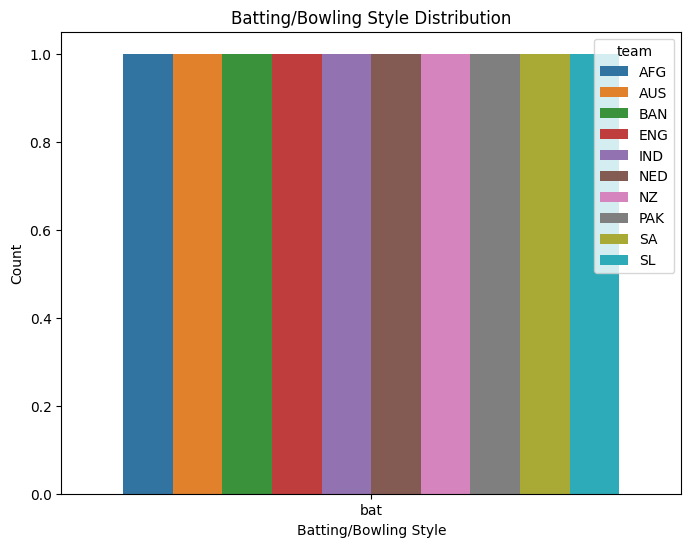


Top Performing Teams:
  team  runs  wkts bat_or_bowl
6   NZ  5376  71.0         bat
1  AUS  5234  77.0         bat
8   SA  5097  88.0         bat


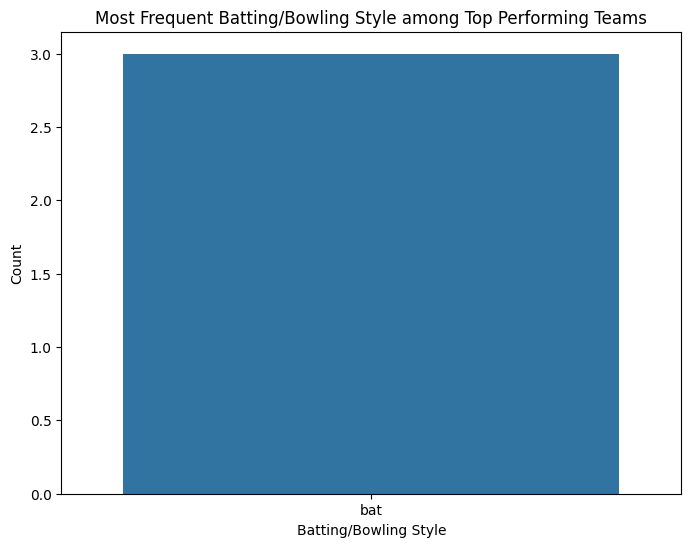

In [91]:
team_player_data = df

# Group by team to get team-wise performance metrics
team_performance = team_player_data.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.mode()[0]
}).reset_index()

# Display team-wise performance metrics
print("\nTeam-wise Performance Metrics:")
print(team_performance)

# Analyze runs scored by each team
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='runs', data=team_performance)
plt.title('Runs Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

# Analyze wickets taken by each team
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='wkts', data=team_performance)
plt.title('Wickets Taken by Teams')
plt.xlabel('Team')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.show()

# Analyze batting/bowling style distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='bat_or_bowl', data=team_performance, hue='team')
plt.title('Batting/Bowling Style Distribution')
plt.xlabel('Batting/Bowling Style')
plt.ylabel('Count')
plt.show()

# Identify top-performing teams based on runs scored and wickets taken
top_teams = team_performance.nlargest(3, 'runs')
print("\nTop Performing Teams:")
print(top_teams)

# Analyze strengths of top-performing teams
# Example: You can analyze the most frequent batting/bowling style of top-performing teams

# Most frequent batting style among top-performing teams
plt.figure(figsize=(8, 6))
sns.countplot(x='bat_or_bowl', data=top_teams)
plt.title('Most Frequent Batting/Bowling Style among Top Performing Teams')
plt.xlabel('Batting/Bowling Style')
plt.ylabel('Count')
plt.show()


In [83]:
#2. Player Performance Analysis:
# - Evaluate individual player statistics for both batting and bowling.
# - Identify leading run-scorers and wicket-takers.
# - Assess the impact of players on their team's performance.

SyntaxError: unterminated string literal (detected at line 4) (596052603.py, line 4)

    team            player bat_or_bowl  bb_bf  runs  wkts  wicketball_prob  \
501  AUS  GJ Maxwell (AUS)         bat    128   201   NaN         0.000000   
502   SA    Q de Kock (SA)         bat    140   174   NaN         0.007143   
503  AUS   DA Warner (AUS)         bat    124   163   NaN         0.008065   

     runs_per_ball     opposition     ground start_date  overs  mdns  econ  \
501         1.5703  v Afghanistan   Wankhede  07-Nov-23    NaN   NaN   NaN   
502         1.2428   v Bangladesh   Wankhede  24-Oct-23    NaN   NaN   NaN   
503         1.3145     v Pakistan  Bengaluru  20-Oct-23    NaN   NaN   NaN   

     inns    4s    6s      sr  not_out   mins  
501     2  21.0  10.0  157.03      1.0  181.0  
502     1  15.0   7.0  124.28      0.0  192.0  
503     1  14.0   9.0  131.45      0.0  180.0  
  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl 

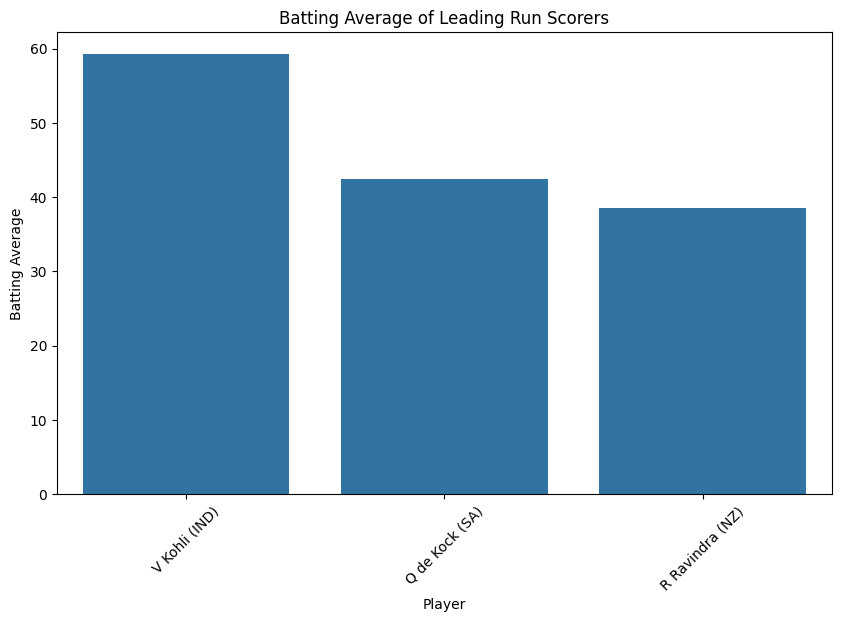

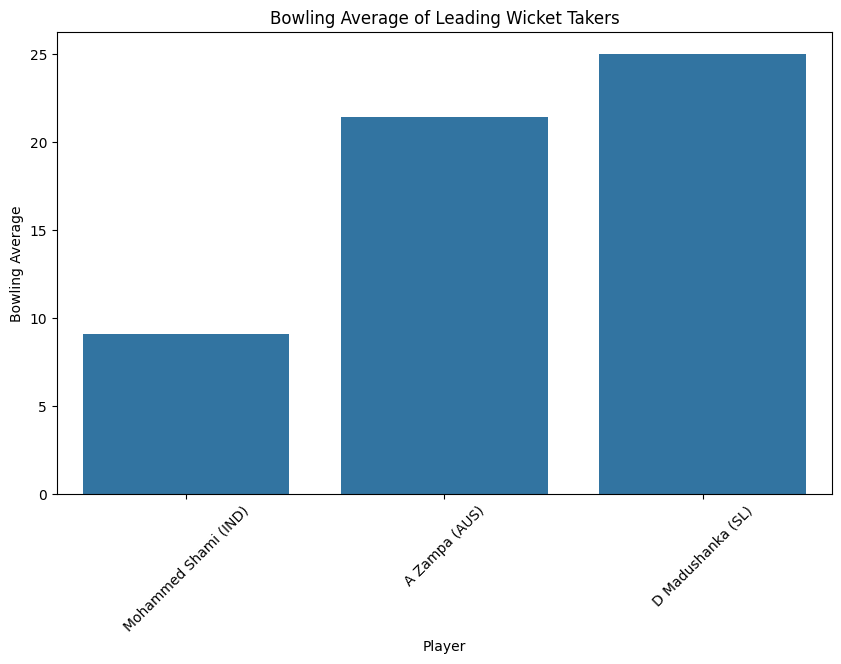

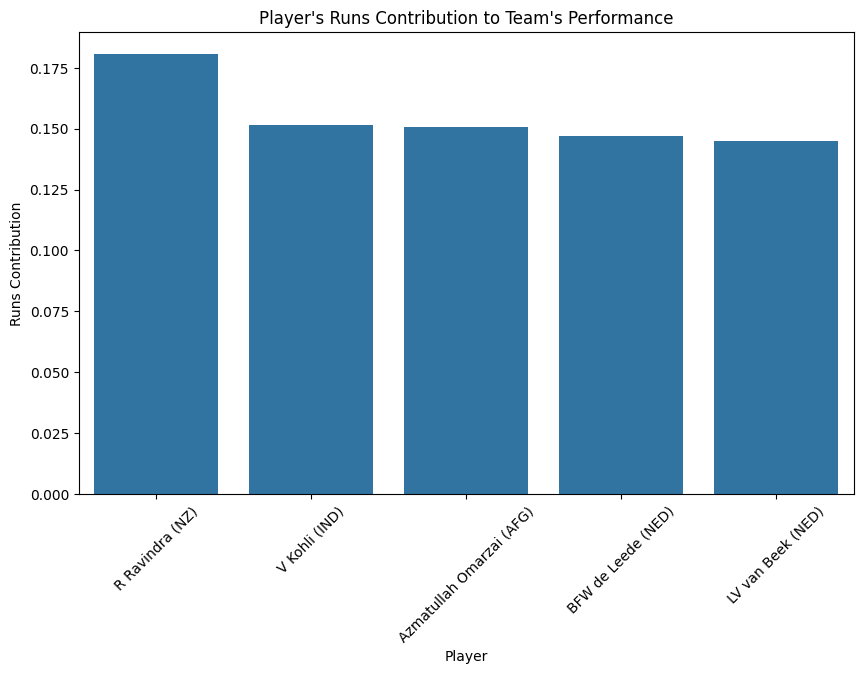

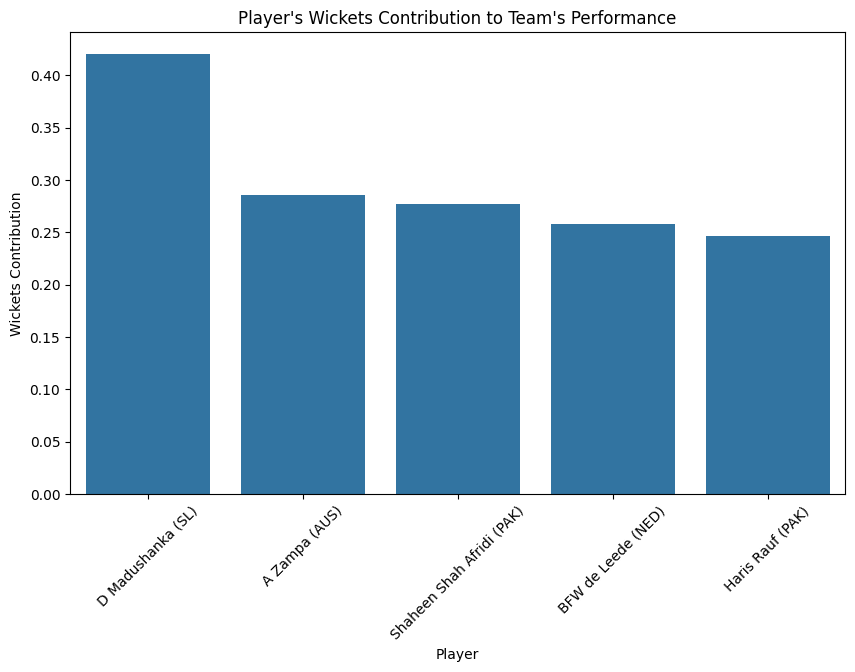

In [95]:
player_performance_data=df

batting_stats = player_performance_data[player_performance_data['bat_or_bowl'] == 'bat']
batting_stats_summary = batting_stats.groupby('player').agg({
    'runs': 'sum',
    'bat_or_bowl': lambda x: x.mode()[0],
    'inns': 'sum',
    'not_out': 'sum',
    'bb_bf': 'sum'
}).reset_index()

print(batting_stats.head(3))
# Calculate batting average
batting_stats_summary['batting_average'] = batting_stats_summary['runs'] / (batting_stats_summary['inns'] - batting_stats_summary['not_out'])

# Bowling statistics
bowling_stats = player_performance_data[player_performance_data['bat_or_bowl'] == 'bowl']
bowling_stats_summary = bowling_stats.groupby('player').agg({
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.mode()[0],
    'overs': 'sum',
    'runs': 'sum',
    'econ':'sum'
}).reset_index()
print(bowling_stats.head(3))
# Calculate bowling average
bowling_stats_summary['bowling_average'] = bowling_stats_summary['runs'] / bowling_stats_summary['wkts']

# Identify leading run-scorers and wicket-takers
leading_run_scorers = batting_stats_summary.nlargest(3, 'runs')
leading_wicket_takers = bowling_stats_summary.nlargest(3, 'wkts')

# Assess the impact of players on their team's performance
# Display leading run-scorers and wicket-takers
print("\nLeading Run Scorers:")
print(leading_run_scorers)
print("\nLeading Wicket Takers:")
print(leading_wicket_takers)

# Visualize the impact of players on their team's performance
# Example: Compare batting average of leading run-scorers with team's average runs scored
plt.figure(figsize=(10, 6))
sns.barplot(x='player', y='batting_average', data=leading_run_scorers)
plt.title('Batting Average of Leading Run Scorers')
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

# Example: Compare bowling average of leading wicket-takers with team's average wickets taken
plt.figure(figsize=(10, 6))
sns.barplot(x='player', y='bowling_average', data=leading_wicket_takers)
plt.title('Bowling Average of Leading Wicket Takers')
plt.xlabel('Player')
plt.ylabel('Bowling Average')
plt.xticks(rotation=45)
plt.show()


team_player_data=df
# Calculate team performance metrics
team_performance = team_player_data.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Calculate individual player statistics
player_stats = team_player_data.groupby(['team', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Merge player statistics with team performance
merged_data = pd.merge(player_stats, team_performance, on='team', suffixes=('_player', '_team'))

# Calculate impact metrics
merged_data['runs_contribution'] = merged_data['runs_player'] / merged_data['runs_team']
merged_data['wickets_contribution'] = merged_data['wkts_player'] / merged_data['wkts_team']

# Visualize impact of players on team's performance
plt.figure(figsize=(10, 6))
sns.barplot(x='player', y='runs_contribution', data=merged_data.nlargest(5,'runs_contribution'))
plt.title("Player's Runs Contribution to Team's Performance")
plt.xlabel('Player')
plt.ylabel('Runs Contribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='player', y='wickets_contribution', data=merged_data.nlargest(5,'wickets_contribution'))
plt.title("Player's Wickets Contribution to Team's Performance")
plt.xlabel('Player')
plt.ylabel('Wickets Contribution')
plt.xticks(rotation=45)
plt.show()

In [24]:
#3. Opposition and Ground Analysis:
# - Investigate how teams and players perform against different oppositions.
# - Examine performance variations across different playing grounds.
# - Identify if there are specific teams or players that excel in certain conditions.

SyntaxError: invalid syntax (2477612425.py, line 1)

In [25]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


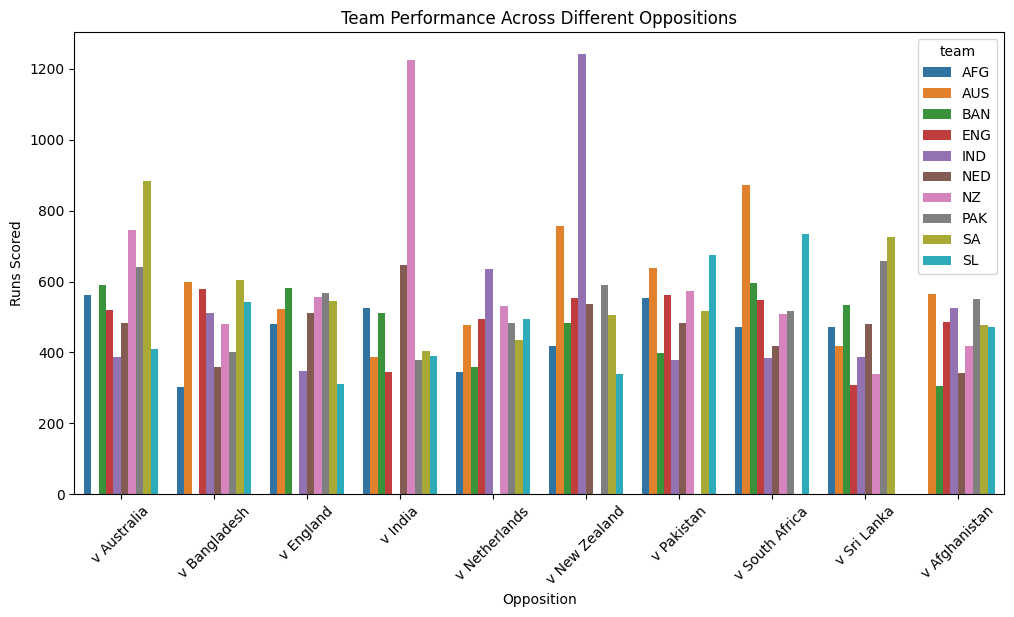

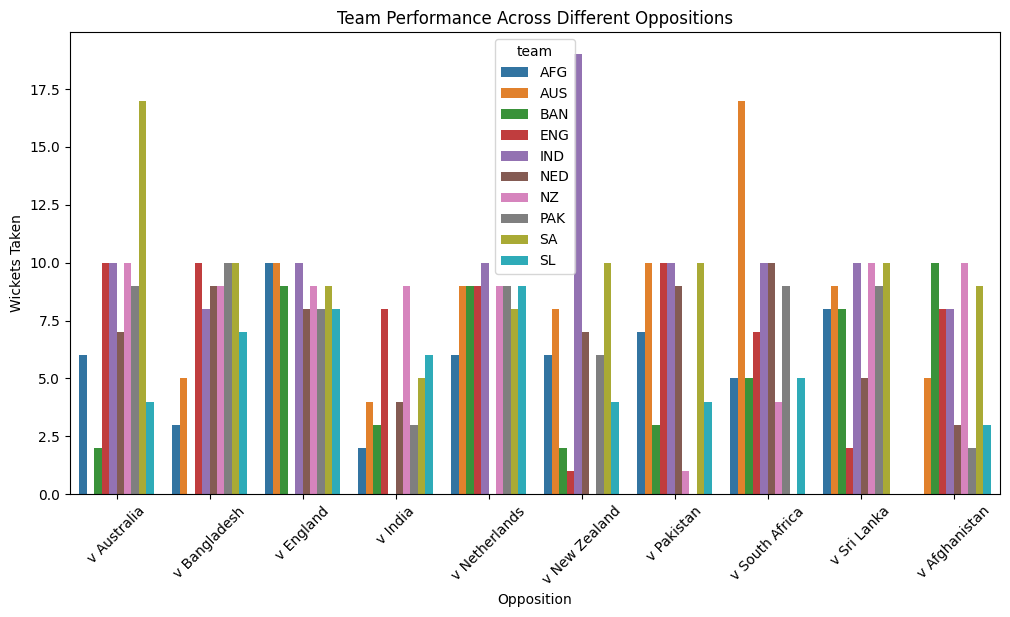

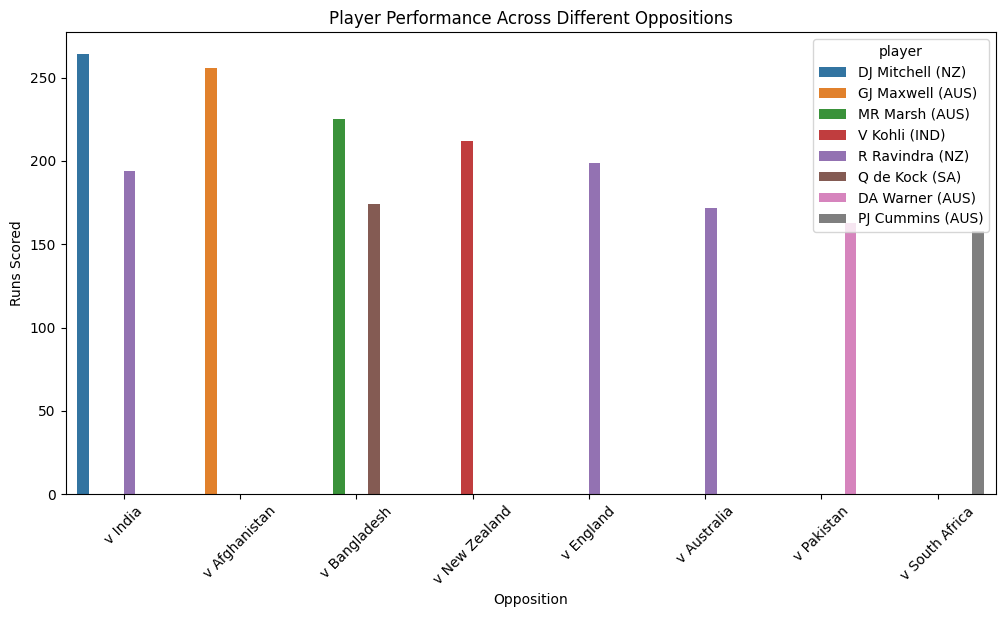

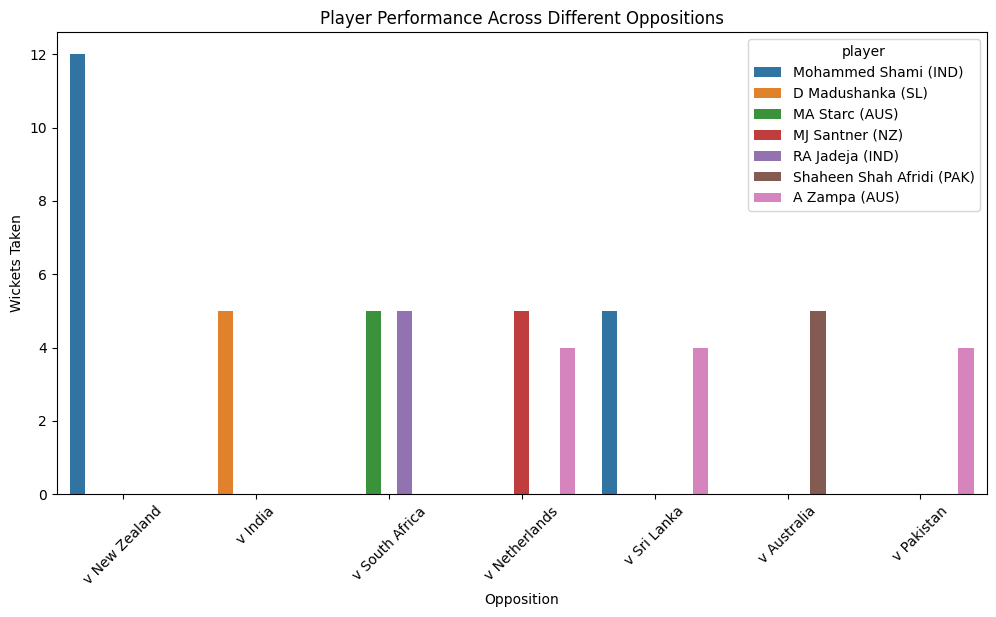

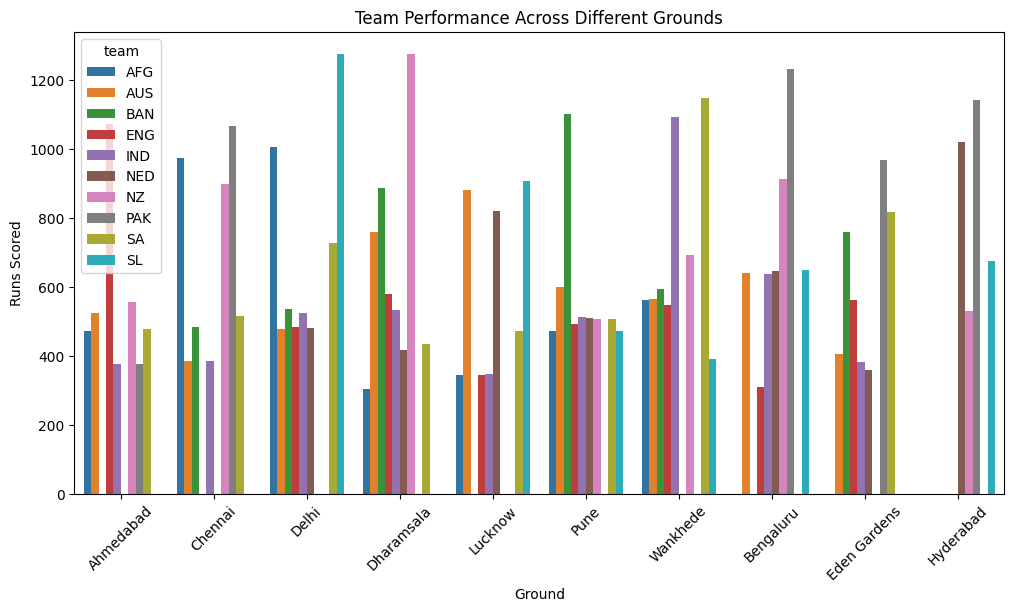

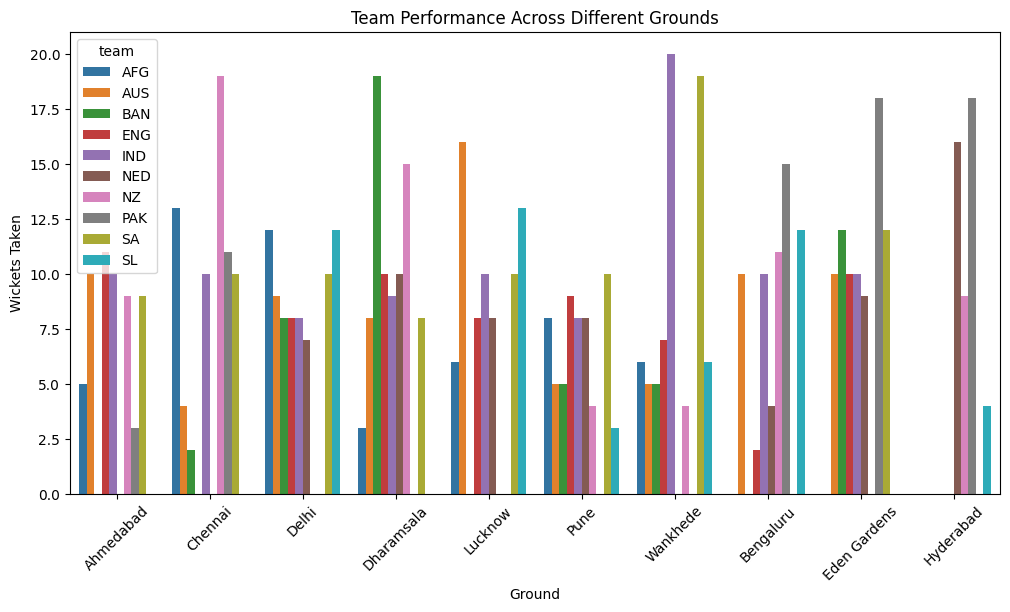

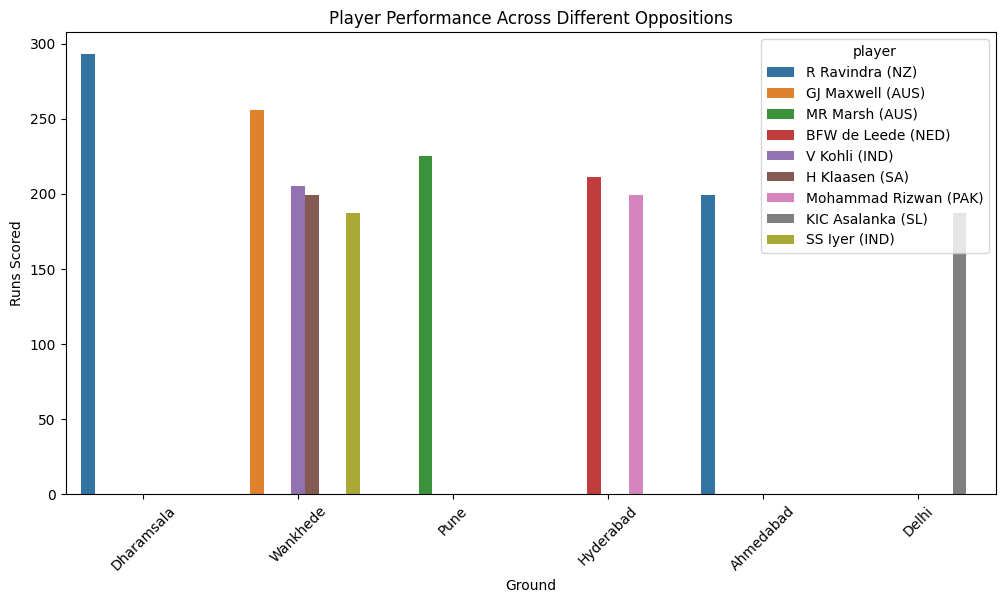

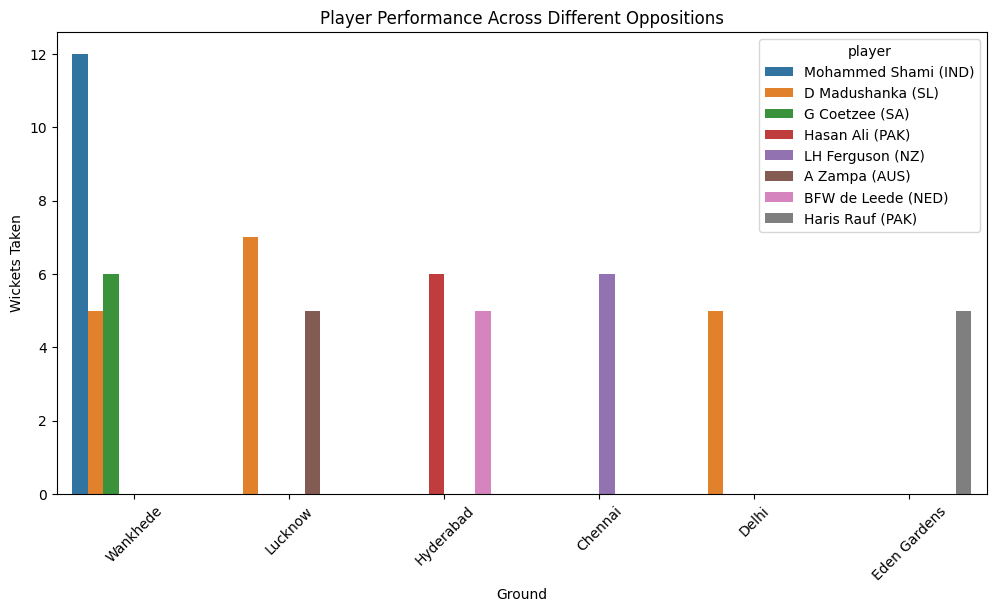

Top Teams Excelling on Certain Grounds:
   team      ground  runs  wkts
49   NZ  Dharamsala  1275  15.0
67   SL       Delhi  1274  12.0
54  PAK   Bengaluru  1231  15.0

Top Players Excelling on Certain Grounds:
                                  runs
player                ground          
V Kohli (IND)         Wankhede     205
GJ Maxwell (AUS)      Wankhede     201
H Klaasen (SA)        Wankhede     199
Mohammad Rizwan (PAK) Hyderabad    199
R Ravindra (NZ)       Dharamsala   191


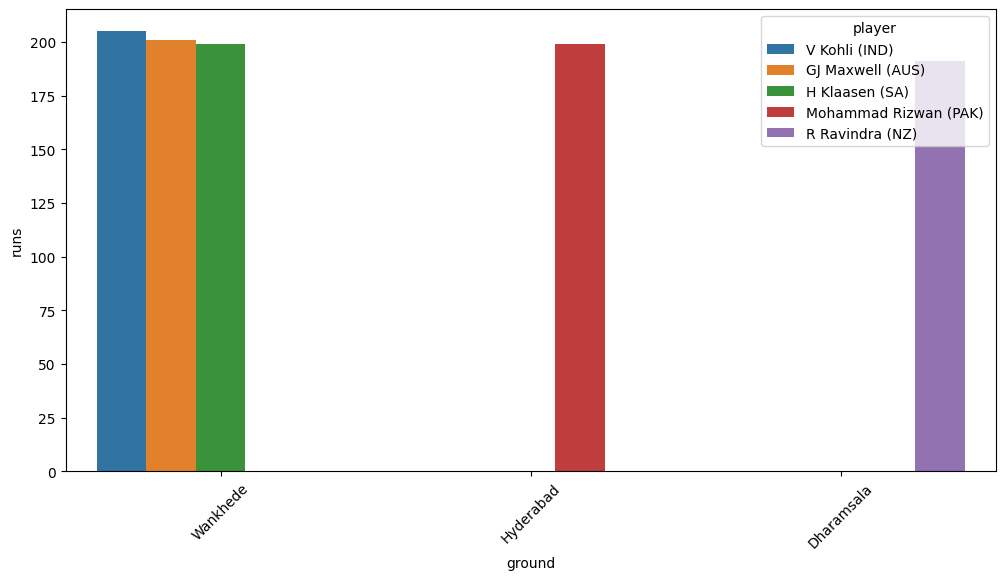

In [97]:
team_player_data = df

# Aggregate team performance metrics based on opposition
team_opposition_performance = team_player_data.groupby(['team','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

# Aggregate player performance metrics based on opposition
player_opposition_performance = team_player_data.groupby(['player', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

# Aggregate team performance metrics based on playing grounds
team_ground_performance = team_player_data.groupby(['team','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

# Aggregate player performance metrics based on playing grounds
player_ground_performance = team_player_data.groupby(['player', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

# Analyze team performance variations across different oppositions
plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', data=team_opposition_performance,hue='team')
plt.title('Team Performance Across Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='wkts', data=team_opposition_performance,hue='team')
plt.title('Team Performance Across Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.show()

# Analyze player performance variations across different oppositions
plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='runs', data=player_opposition_performance.nlargest(10,'runs'),hue='player')
plt.title('Player Performance Across Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='opposition', y='wkts', data=player_opposition_performance.nlargest(10,'wkts'),hue='player')
plt.title('Player Performance Across Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.show()

# Analyze team performance variations across different playing grounds
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='runs', data=team_ground_performance,hue='team')
plt.title('Team Performance Across Different Grounds')
plt.xlabel('Ground')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='wkts', data=team_ground_performance,hue='team')
plt.title('Team Performance Across Different Grounds')
plt.xlabel('Ground')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.show()

# Analyze player performance variations across different playing grounds
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='runs', data=player_ground_performance.nlargest(10,'runs'),hue='player')
plt.title('Player Performance Across Different Oppositions')
plt.xlabel('Ground')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='wkts', data=player_ground_performance.nlargest(10,'wkts'),hue='player')
plt.title('Player Performance Across Different Oppositions')
plt.xlabel('Ground')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.show()

# Identify teams that excel on certain grounds
top_teams_ground = team_ground_performance.nlargest(3, 'runs')
print("Top Teams Excelling on Certain Grounds:")
print(top_teams_ground)

team_player_data = df
team_player_data=team_player_data[team_player_data['bat_or_bowl']=='bat']
player_ground_performance = team_player_data.groupby(['player', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()
# Identify players that excel on certain grounds
top_players_ground = player_ground_performance.groupby(['player','ground']).agg({'runs':'sum'}).nlargest(5, 'runs')
print("\nTop Players Excelling on Certain Grounds:")
print(top_players_ground)
plt.figure(figsize=(12, 6))
sns.barplot(x='ground', y='runs', data=top_players_ground.nlargest(10,'runs'),hue='player')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#4. Temporal Analysis:
# - Study performance trends over time, considering start dates and overs played.
# - Identify any temporal patterns or changes in team and player performance.

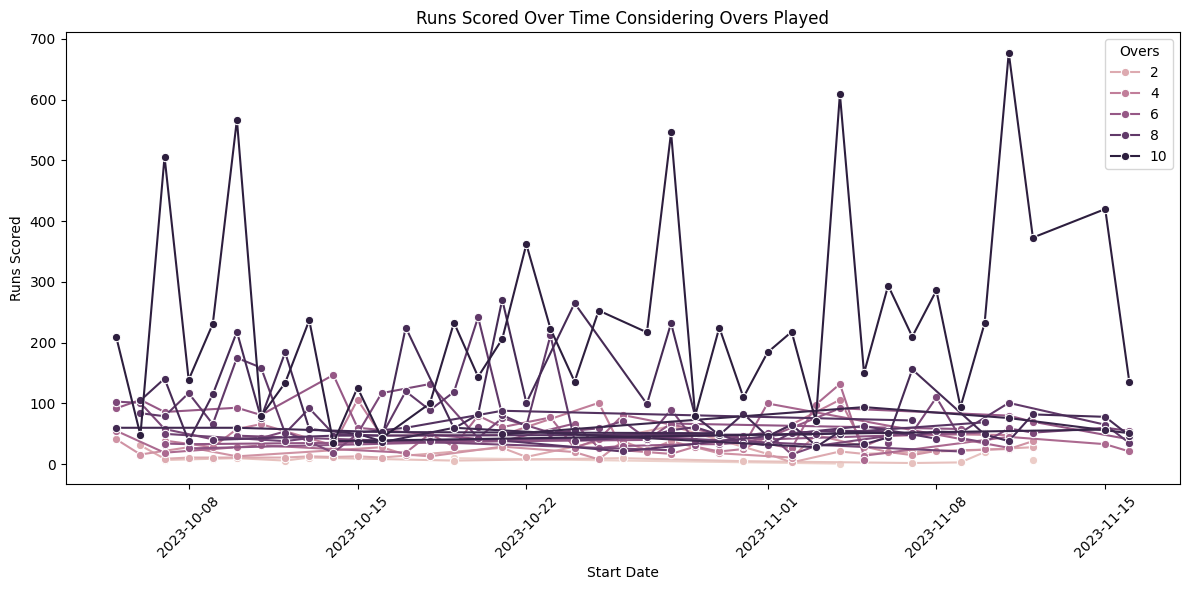

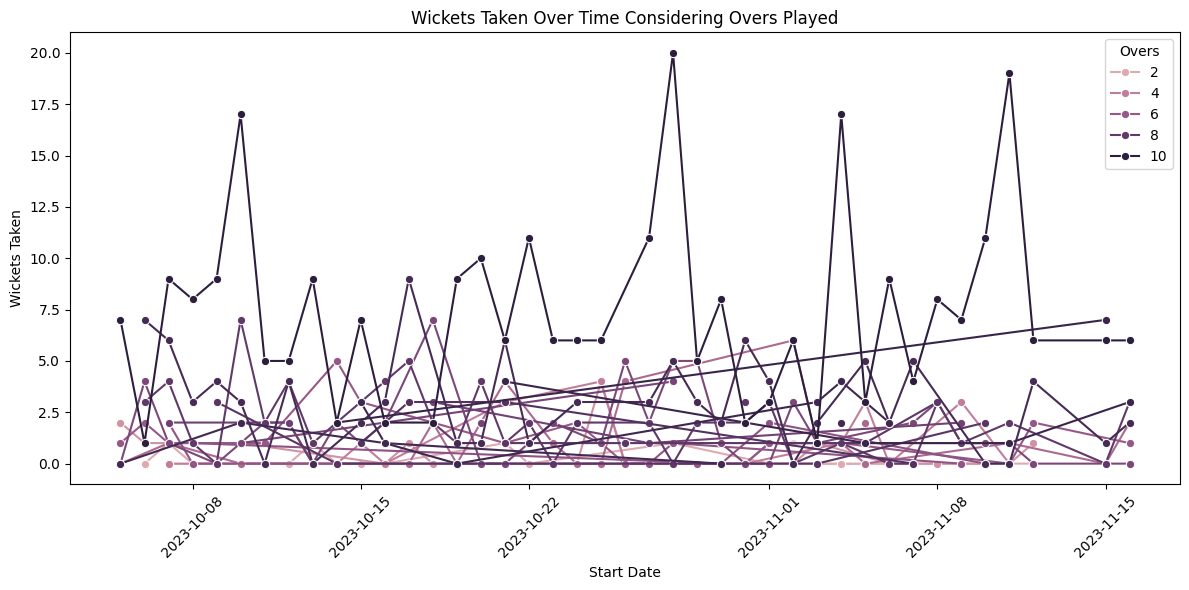

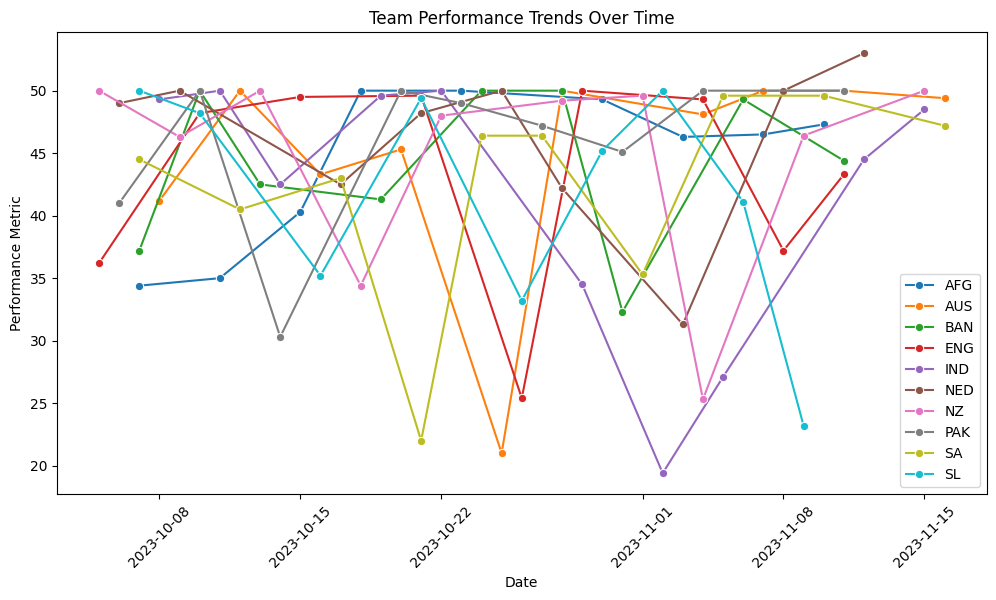

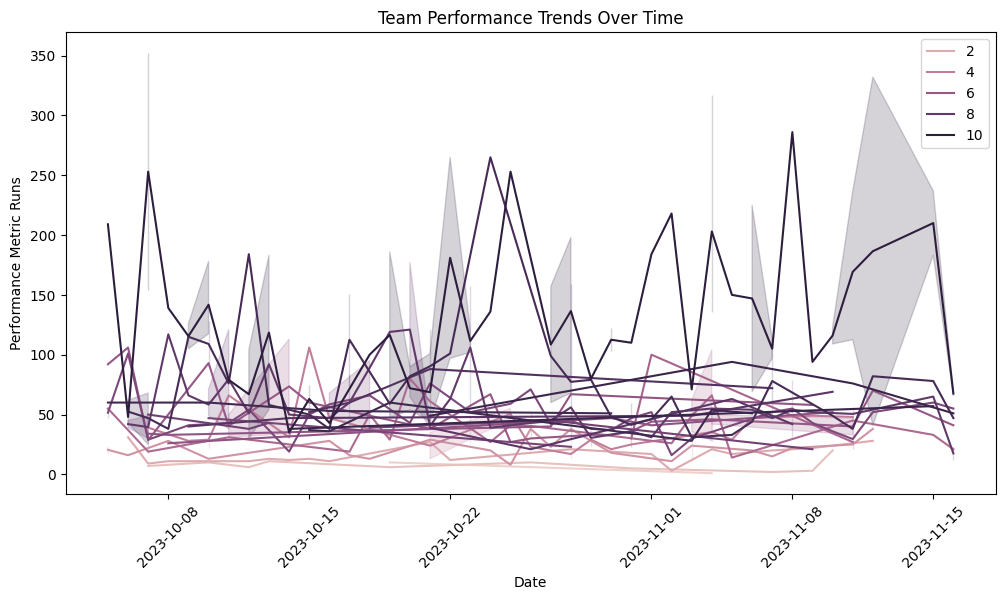

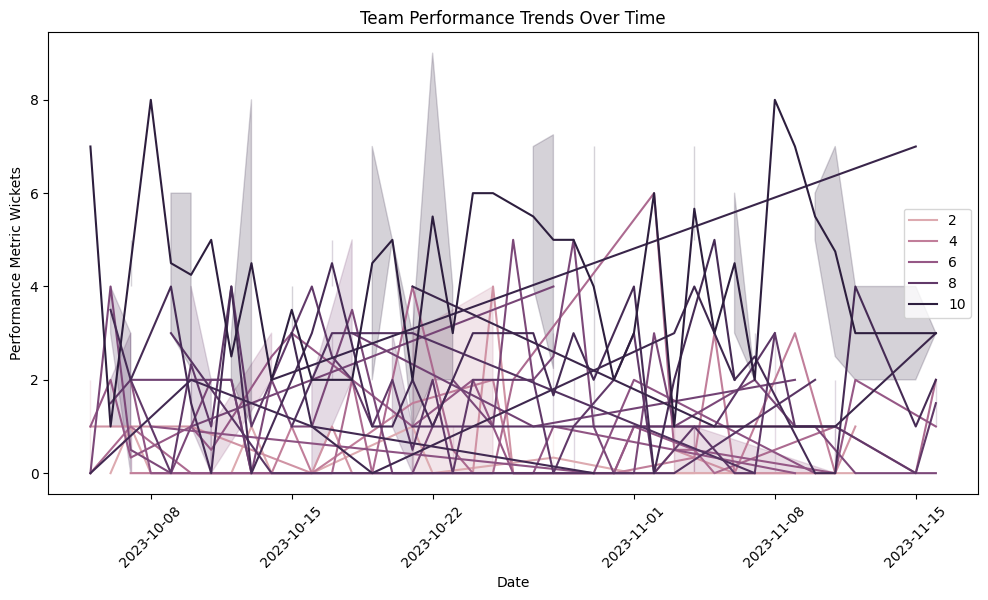

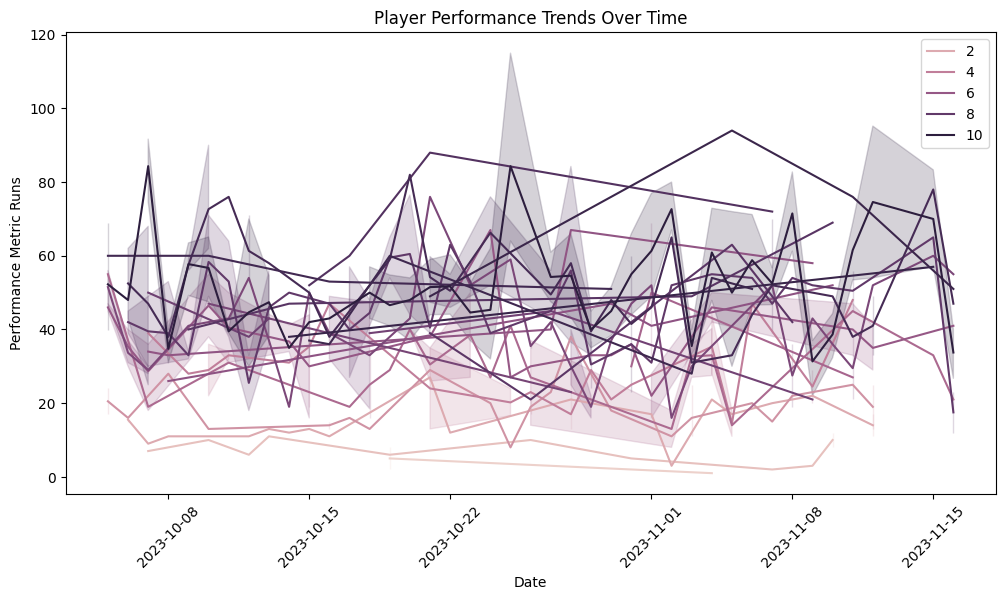

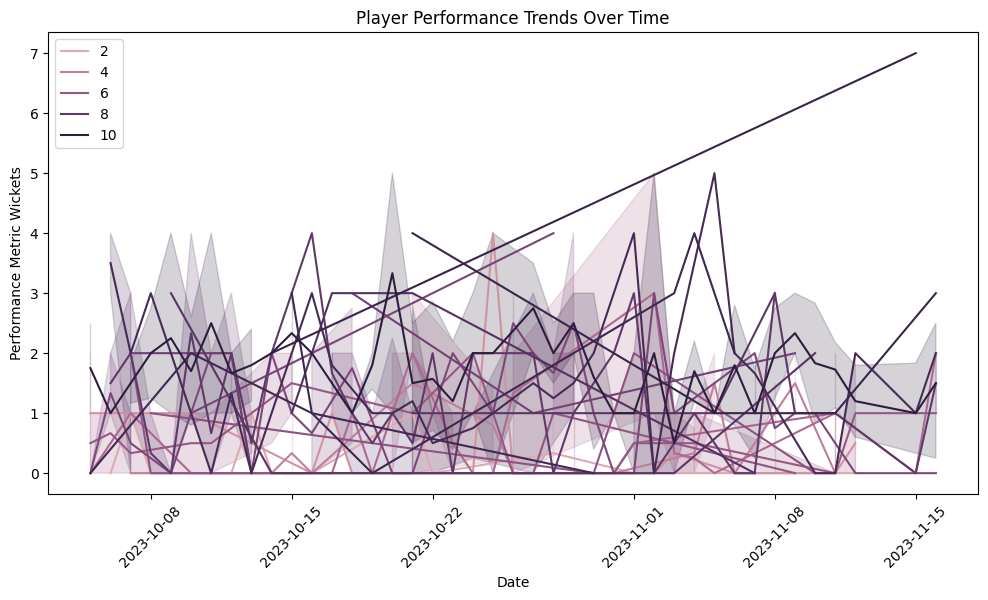

In [67]:
team_player_data = df

# Convert 'start_date' column to datetime format
team_player_data['start_date'] = pd.to_datetime(team_player_data['start_date'])

# Aggregate performance metrics over time, considering start dates and overs played
performance_over_time = team_player_data.groupby(['start_date', 'overs']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    # Add more performance metrics as needed
}).reset_index()

# Visualize performance trends over time, considering start dates and overs played
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', hue='overs', data=performance_over_time, marker='o')
plt.title('Runs Scored Over Time Considering Overs Played')
plt.xlabel('Start Date')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Overs')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', hue='overs', data=performance_over_time, marker='o')
plt.title('Wickets Taken Over Time Considering Overs Played')
plt.xlabel('Start Date')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.legend(title='Overs')
plt.tight_layout()
plt.show()

team_temporal_performance = team_player_data.groupby(['team','start_date']).agg({
    'overs':'sum'
}).reset_index()

# Aggregate player performance metrics over time
player_temporal_performance = team_player_data.groupby(['player', 'start_date']).agg({
    'overs':'sum'
    # Add more player performance metrics as needed
}).reset_index()

# Visualize team performance trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='overs', hue='team',data=team_temporal_performance, marker='o')
plt.title('Team Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Metric')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Aggregate team performance metrics over time
team_temporal_performance = team_player_data.groupby(['team','start_date','overs']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Aggregate player performance metrics over time
player_temporal_performance = team_player_data.groupby(['player', 'start_date','overs']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Visualize team performance trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=team_temporal_performance, hue='overs')
plt.title('Team Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Metric Runs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', data=team_temporal_performance, hue='overs')
plt.title('Team Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Metric Wickets')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Visualize player performance trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=player_temporal_performance, hue='overs')
plt.title('Player Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Metric Runs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', data=player_temporal_performance, hue='overs')
plt.title('Player Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Metric Wickets')
plt.legend()
plt.xticks(rotation=45)
plt.show()